# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Weiqing Li
    
    Hang yin
    
    Haowen Zhu
    
    Dekun Geng
    
    Yixin Luo
    
    

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

n_samples: 2000
clf__alpha: 0.01
tfidf__use_idf: False
vect__ngram_range: (1, 2)
0 params - {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}; mean - 0.77; std - 0.01
1 params - {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}; mean - 0.80; std - 0.01
2 params - {'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}; mean - 0.81; std - 0.00
3 params - {'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}; mean - 0.82; std - 0.00
4 params - {'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}; mean - 0.74; std - 0.01
5 params - {'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}; mean - 0.79; std - 0.01
6 params - {'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}; mean - 0.78; std - 0.01
7 params - {'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}; mean - 0.81; std - 0.01
             precision    recal

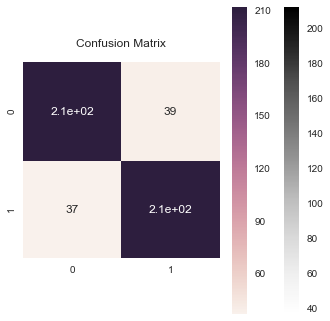

In [15]:

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
if __name__ == "__main__":
    movie_reviews_data_folder = 'txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    # TASK: Build a vectorizer / classifier pipeline that filters out tokens
    # that are too rare or too frequent
    pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
        'tfidf__use_idf': (True, False),
        'clf__alpha': (1e-2, 1e-3),
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search = grid_search.fit(docs_train, y_train)
    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    
    for param_name in sorted(parameters.keys()):
        print("%s: %r" % (param_name, grid_search.best_params_[param_name]))
            
    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)

    import matplotlib.pyplot as plt
    import seaborn as sn
    plt.matshow(cm)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    sn.heatmap(cm, annot=True,)
    plt.show()
   

# From the result, we can see the combination of unigrams and bigrams is better than others.

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [16]:

from sklearn.datasets import load_files
movie_reviews_data_folder = 'txt_sentoken'
dataset = load_files(movie_reviews_data_folder, shuffle=False)

from sklearn.model_selection import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)


from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
docs_train_counts = count_vect.fit_transform(docs_train)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
docs_train_tfidf = tfidf_transformer.fit_transform(docs_train_counts)

In [17]:
# run the TfidVectorizer class on the training data(docs_train)
#Convert a collection of raw documents to a matrix of TF-IDF features.Equivalent to CountVectorizer followed by TfidfTransformer.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input = "docs_train",min_df=1, encoding='utf-8',ngram_range = (1,1))
X = vectorizer.fit_transform(docs_train)
idf = vectorizer._tfidf.idf_
dic = dict(zip(vectorizer.get_feature_names(), idf))
print(dic)

{'00': 6.3679766825781483, '000': 4.1242320896070366, '0009f': 7.6207396510735164, '007': 6.2344452899536265, '00s': 7.6207396510735164, '05': 6.927592470513571, '10': 3.3302802099251254, '100': 4.2030129674601504, '1000': 5.9159915588350911, '10000': 7.6207396510735164, '100m': 7.6207396510735164, '101': 5.8289801818454618, '102': 6.5221273624054072, '103': 6.927592470513571, '104': 7.6207396510735164, '105': 6.7044489191993613, '106': 7.2152745429653526, '107': 6.927592470513571, '108': 7.2152745429653526, '10b': 7.6207396510735164, '10s': 7.6207396510735164, '10th': 7.6207396510735164, '11': 5.1783926157043121, '110': 7.2152745429653526, '111': 7.6207396510735164, '112': 7.6207396510735164, '113': 7.6207396510735164, '1138': 7.6207396510735164, '114': 7.6207396510735164, '115': 6.927592470513571, '117': 7.6207396510735164, '118': 7.6207396510735164, '11th': 7.2152745429653526, '12': 4.6003147649291538, '122': 7.6207396510735164, '123': 7.6207396510735164, '125': 7.6207396510735164, 

In [21]:
import math
from operator import itemgetter

from sklearn.feature_extraction.text import TfidfVectorizer
def freq(word, document):
  return document.split(None).count(word)

def wordCount(document):
  return len(document.split(None))

def numDocsContaining(word,documentList):
  count = 0
  for document in documentList:
    if freq(word,document) > 0:
      count += 1
  return count

def tf(word, document):
  return (freq(word,document) / float(wordCount(document)))

def idf(word, documentList):
  return math.log(len(documentList) / numDocsContaining(word,documentList))

def tfidf(word, document, documentList):
  return (tf(word,document) * idf(word,documentList))
# Run the TfidVectorizer class on the training data above (docs_train).
# Build a vectorizer / classifier pipeline that filters out tokens that are too rare or too frequent
from sklearn.feature_extraction.text import CountVectorizer
pipeline1 = Pipeline([
  ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
  ('clf', LinearSVC(C=1000))
])

# Build a grid search to find out best min_df and max_df.
# Fit the pipeline on the training set using grid search for the parameters
parameters = { 
    'vect__min_df': range(0, 6),
    'vect__max_df': [ 0.75,0.8, 0.85, 0.9, 0.92, 0.94, 0.95]
}
grid_search = GridSearchCV(pipeline1, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

print ('Best parameters for TfidfVectorizer:')
best_parameters, score, _ = max(grid_search.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
print

print (lambda x: x[1])
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(docs_train)
print (X_train_counts.shape)

# Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
  ('vect', TfidfVectorizer(min_df=4, max_df=0.75)),
  ('clf', LinearSVC(C=1000))
])

# Build a grid search to find out best value for ngram range.
# Fit the pipeline on the training set using grid search for the parameters
parameters = { 'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)] }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

print ('Best parameters for TfidfVectorizer:')
best_parameters, score, _ = max(grid_search.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
print
# Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

Best parameters for TfidfVectorizer:
vect__max_df: 0.75
vect__min_df: 0
<function <lambda> at 0x11fbadf28>


/Users/geng/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


(1500, 35088)
             precision    recall  f1-score   support

        neg       0.87      0.82      0.85       256
        pos       0.82      0.87      0.85       244

avg / total       0.85      0.85      0.85       500

[[211  45]
 [ 32 212]]
Best parameters for TfidfVectorizer:
vect__ngram_range: (1, 3)


/Users/geng/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


             precision    recall  f1-score   support

        neg       0.88      0.87      0.87       256
        pos       0.86      0.88      0.87       244

avg / total       0.87      0.87      0.87       500

[[222  34]
 [ 30 214]]


Define the term frequency–inverse document frequency (TF-IDF)
ANS: The tf–idf is the product of two statistics, term frequency and inverse document frequency. 

Explore the min_df and max_df parameters of TfidVectorizer. What do they mean? How do they change the features you get?
ANS: 
min_df, In the vocabulary we built, terms that have the lowest document frequency . 0.000 represents 0% proportion of documents.
min_df is used for removing terms that appear too infrequently. For example: min_df = 0.00 means "ignore terms that appear in less than 0 document".
max_df, In the vocabulary we built, terms that have the best document frequency . 0.75 represents 75% proportion of documents.
max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words".  For example: max_df = 0.75 means "ignore terms that appear in more than 75% of the documents".

Explore the ngram_range parameter of TfidVectorizer. What does it mean? How does it change the features you get?
ANS:
ngram_range : tuple (min_n, max_n)
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. We get the best ngram_range (1, 3) means that all values of n such that 1<=n<=3 will be used. Also we can say that unigrams, bigrams and trigrams will be extracted.

*------------------------

## Problem 3 (20 points): Machine learning algorithms


In [8]:
#"fit" your TfidfVectorizer using docs_train
#Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train

from sklearn.datasets import load_files
movie_reviews_data_folder = 'txt_sentoken'
dataset = load_files(movie_reviews_data_folder, shuffle=False)

from sklearn.model_selection import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input = "docs_train",min_df=0,max_df = 1.0, encoding='utf-8',ngram_range = (1,1))
xtrain = vectorizer.fit_transform(docs_train)
print(xtrain)

  (0, 14306)	0.0251785561497
  (0, 21409)	0.0230592820966
  (0, 1102)	0.0298085431823
  (0, 32620)	0.0722395284218
  (0, 26560)	0.0733719882419
  (0, 11746)	0.01951402326
  (0, 34400)	0.0418135524115
  (0, 9286)	0.0277525146139
  (0, 26331)	0.0229895306856
  (0, 34688)	0.0428092849767
  (0, 2250)	0.0240635520637
  (0, 17970)	0.0481764175228
  (0, 28687)	0.0380661281981
  (0, 10831)	0.0531297408153
  (0, 26044)	0.0565553145602
  (0, 31424)	0.0134161150355
  (0, 4776)	0.0431551134794
  (0, 2968)	0.0234409507808
  (0, 10374)	0.0441757917057
  (0, 30712)	0.0591759704175
  (0, 1809)	0.0440005304867
  (0, 4585)	0.0439077719912
  (0, 16629)	0.0849366393726
  (0, 14507)	0.0347991551844
  (0, 21699)	0.10434746612
  :	:
  (1499, 9705)	0.0868900889261
  (1499, 2161)	0.0450577536448
  (1499, 20271)	0.0450577536448
  (1499, 8130)	0.0484545767388
  (1499, 30201)	0.0471368973931
  (1499, 6538)	0.0521464296688
  (1499, 1833)	0.0521464296688
  (1499, 17951)	0.0521464296688
  (1499, 3542)	0.050067285920

In [9]:
#Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
vectorizer = TfidfVectorizer(input = "docs_test",min_df=0,max_df = 1.0, encoding='utf-8',ngram_range = (1,1))
xtest = vectorizer.fit_transform(docs_test)
print(xtest)

  (0, 944)	0.066162561136
  (0, 1558)	0.0329677290135
  (0, 7157)	0.0210430926255
  (0, 13559)	0.153174211175
  (0, 19774)	0.417449357894
  (0, 790)	0.322734033731
  (0, 16889)	0.095687270837
  (0, 18194)	0.0302059514762
  (0, 19844)	0.0370831993246
  (0, 16424)	0.03473562269
  (0, 10371)	0.129867907974
  (0, 13519)	0.0200489967746
  (0, 19451)	0.0318957569457
  (0, 2067)	0.0342797167912
  (0, 1429)	0.0201303500033
  (0, 11195)	0.0139487999199
  (0, 566)	0.0342797167912
  (0, 10391)	0.136859371389
  (0, 4475)	0.0573253830748
  (0, 19772)	0.0537679026446
  (0, 5787)	0.0224987705489
  (0, 12210)	0.0193130915118
  (0, 8406)	0.0278203506717
  (0, 1823)	0.0195323705253
  (0, 8291)	0.0201811274682
  :	:
  (499, 11784)	0.0297714028087
  (499, 17056)	0.0297714028087
  (499, 10572)	0.0297714028087
  (499, 6278)	0.0297714028087
  (499, 20266)	0.0297714028087
  (499, 19397)	0.0297714028087
  (499, 16174)	0.0297714028087
  (499, 5676)	0.0297714028087
  (499, 6928)	0.0297714028087
  (499, 2282)	0.0

In [10]:
# we test the classifier svc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
if __name__ == "__main__":
    movie_reviews_data_folder = 'txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)


    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=10)

    parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__C': (1000, 10000)}


    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', LinearSVC(C=1000)),
                         ])

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(docs_train, y_train)
gs_clf.best_score_

0.83066666666666666

In [11]:
for param_name in sorted(parameters.keys()):
      print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__C: 1000
tfidf__use_idf: True
vect__ngram_range: (1, 1)


             precision    recall  f1-score   support

        neg       0.86      0.80      0.83       253
        pos       0.81      0.86      0.83       247

avg / total       0.83      0.83      0.83       500

[[202  51]
 [ 34 213]]


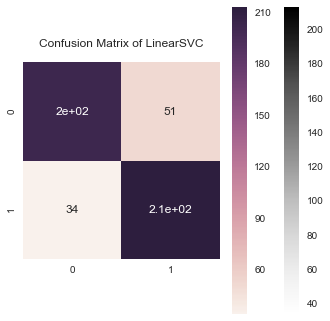

In [12]:
# Print and plot the confusion matrix of LinearSVC
y_predicted = gs_clf.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
import matplotlib.pyplot as plt
import seaborn as sn
plt.matshow(cm)
plt.title('Confusion Matrix of LinearSVC')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
sn.heatmap(cm, annot=True,)
plt.show()

In [13]:
# For LinearSVC classifier, the best parameters are : C=1000, use the tfidetransfomer and the ngram:(1,1)

In [14]:
# we test the KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
if __name__ == "__main__":
    movie_reviews_data_folder = 'txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)


    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=10)

    parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                  'tfidf__use_idf': (True, False),
                  'clf__n_neighbors': (1, 60)}


    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', KNeighborsClassifier(n_neighbors=5)),
                         ])

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(docs_train, y_train)
gs_clf.best_score_

0.624

In [15]:
for param_name in sorted(parameters.keys()):
      print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__n_neighbors: 1
tfidf__use_idf: True
vect__ngram_range: (1, 1)


             precision    recall  f1-score   support

        neg       0.76      0.49      0.60       253
        pos       0.62      0.84      0.71       247

avg / total       0.69      0.66      0.65       500

[[124 129]
 [ 39 208]]


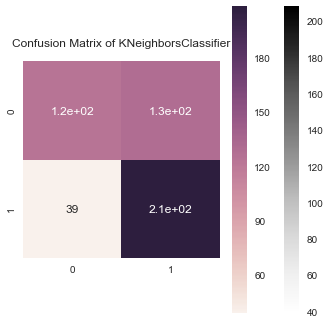

In [16]:
# Print and plot the confusion matrix of KNeighborsClassifier
y_predicted = gs_clf.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
import matplotlib.pyplot as plt
import seaborn as sn
plt.matshow(cm)
plt.title('Confusion Matrix of KNeighborsClassifier')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
sn.heatmap(cm, annot=True,)
plt.show()

In [17]:
# For KNeighborsClassifier, the best parameters are : n_neighbors=1, use the tfidetransfomer and the ngram:(1,1)

In [ ]:
#Does one classifier, or one set of parameters work better?
#Ans: Yes. The LinearSVC is better. 
#Why do you think it might be working better?
#Ans : Because LinearSVC has the higher accuracy in prediction than KNeighbors. From the confusion figure,we can see the average precision is 0.83,which is much higher than 0.69 of KNeighborsClassifier, 
# and in the KNeighbors Classifier, we can find more errors in neg or pos. 
#For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
#Can you conjecture on why the classifier made a mistake for this prediction?
#Ans : If we choose KNeighbors Classifier, the reason of failures might be caused by the "n_neighbors", which is 1. Although "n_neighbors = 1" made the least errors, it would overfitting.

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [1]:
#achieve data
import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)

Decompressing review_polarity.tar.gz


In [1]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')   
%matplotlib inline


In [2]:
#load data
movie_reviews_data_folder = "/Users/weiqingli/Downloads/review_polarity/txt_sentoken"
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [3]:
#Bags of words 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from string import punctuation

background = ['film','films','movie','movies','plot','story','tickets','character','characters']
stopwords = set(stopwords.words('english') + list(punctuation)+ background)

In [4]:
tfidf_vec = TfidfVectorizer(stop_words=stopwords,max_df = 0.95,min_df = 0.05)
X_tfidf = tfidf_vec.fit_transform(dataset.data)
X_tfidf.shape                    

(2000, 983)

In [5]:
#using chi2 to select K best features and select 20 by their subjectivity and polarity
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X,y = X_tfidf, dataset.target
ch2 = SelectKBest(chi2, k=40)
X_new = ch2.fit_transform(X, y)

feature_names = tfidf_vec.get_feature_names()
if feature_names:
    # keep selected feature names
    feature_names = [feature_names[i] for i
                     in ch2.get_support(indices=True)]

In [6]:
#show the 40 features with highest chi2
feature_names

['american',
 'attempt',
 'awful',
 'bad',
 'boring',
 'brilliant',
 'dull',
 'effective',
 'excellent',
 'fails',
 'family',
 'great',
 'hilarious',
 'life',
 'looks',
 'memorable',
 'mess',
 'minute',
 'nothing',
 'oscar',
 'overall',
 'perfect',
 'perfectly',
 'poor',
 'reason',
 'ridiculous',
 'script',
 'stupid',
 'subtle',
 'supposed',
 'terrible',
 'true',
 'unfortunately',
 'war',
 'waste',
 'wasted',
 'wonderful',
 'world',
 'worse',
 'worst']

In [7]:
#get every word's polarity and subjectivity using TextBlob
from textblob import TextBlob
def chooseword(feature_names):
    tag=[]
    polarity=[]
    subjectivity=[]
    for feature in feature_names:
        wiki = TextBlob(feature)
        tag.append(wiki.tags[0][1])
        polarity.append(wiki.sentiment.polarity)
        subjectivity.append(wiki.sentiment.subjectivity)
    return [feature_names,tag,polarity,subjectivity]

In [8]:
# choose word with subjectivity>0.5
from prettytable import PrettyTable

cw=chooseword(feature_names)

T = PrettyTable(['word','tag','polarity','subjectivity'])
for i in range(len(cw[0])):
    if cw[3][i]>0.5: #add filter: sub>0.5
        T.add_row([cw[0][i],cw[1][i],cw[2][i],cw[3][i]])
print(T)

+---------------+-----+---------------------+--------------------+
|      word     | tag |       polarity      |    subjectivity    |
+---------------+-----+---------------------+--------------------+
|     awful     |  NN |         -1.0        |        1.0         |
|      bad      |  JJ | -0.6999999999999998 | 0.6666666666666666 |
|     boring    |  NN |         -1.0        |        1.0         |
|   brilliant   |  NN |         0.9         |        1.0         |
|   effective   |  JJ |         0.6         |        0.8         |
|   excellent   |  NN |         1.0         |        1.0         |
|     great     |  JJ |         0.8         |        0.75        |
|   hilarious   |  JJ |         0.5         |        1.0         |
|   memorable   |  JJ |         0.5         |        1.0         |
|    perfect    |  NN |         1.0         |        1.0         |
|   perfectly   |  RB |         1.0         |        1.0         |
|      poor     |  JJ |         -0.4        |        0.6      

In [9]:
#choose goodword list and badword list by their polarity
gw = ['brilliant','effective','excellent','great','hilarious',
      'memorable','perfect','perfectly','true','wonderful']
bw = ['awful','bad','boring','poor','ridiculous','stupid',
      'terrible','unfortunately','worse','worst']

In [10]:
#generate a dictionary for word and its polarity
polar = {}
for i in range(len(cw[0])):
    polar[cw[0][i]]=cw[2][i]

In [11]:
#generate a dictionary for word and its subjectivity
subj = {}
for i in range(len(cw[0])):
    subj[cw[0][i]]=cw[3][i]

In [12]:
# Using count for one dimention 
count_vec = CountVectorizer(stop_words=stopwords,max_df = 0.95,min_df = 0.05)
X_count = count_vec.fit_transform(dataset.data)
X_count.shape 

(2000, 983)

In [13]:
#imporved with weighted score
def getweightscore(words,data,tfidf_vec,weight):
    vd = tfidf_vec.vocabulary_
    scores=[]
    a = 0
    for i in range(len(data.toarray())):
        a = weightscore(words,data.toarray()[i],vd,weight)
        scores.append(a)
    return scores

def weightscore(words,datarow,vd,weight):
    s = 0
    for word in words:
        s = s + weight[word]*datarow[vd[word]]
    return s

In [14]:
neweight = {}
for key in polar.keys():
    neweight[key] = polar[key] * subj[key] 


In [15]:
weightscore = getweightscore(gw+bw,X_count,count_vec,neweight)

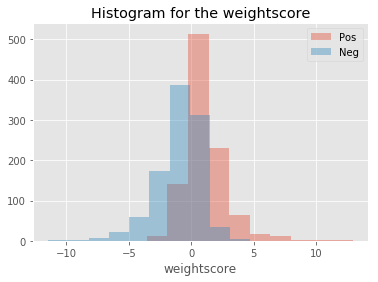

In [17]:
rects2 = plt.hist(weightscore[1000:2000], alpha=0.4 ,label='Pos')
rects1 = plt.hist(weightscore[0:1000], alpha=0.4,label='Neg')  
plt.xlabel("weightscore")
plt.title("Histogram for the weightscore")
plt.legend()
plt.show()

Find the second dimention by using SVM
***

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer


In [30]:
tfidf_vec1 = TfidfVectorizer(input = "docs_train",min_df=0,max_df = 1,stop_words="english") 
X_tfidf1 = tfidf_vec1.fit_transform(dataset.data)

In [31]:
X_train_tfidf1, X_test_tfidf1, y_train, y_test = train_test_split(
        X_tfidf1, dataset.target, test_size=0.25, random_state=10)

In [7]:
print(X_train_tfidf1.shape)
print(X_test_tfidf1.shape)

(1500, 39354)
(500, 39354)


In [8]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

clf = LinearSVC(C = 1000)

svc = clf.fit(X_train_tfidf1, y_train)

y_predicted = svc.predict(X_test_tfidf1)

print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.84      0.81      0.82       253
        pos       0.81      0.84      0.83       247

avg / total       0.83      0.83      0.83       500



In [34]:
decision = svc.decision_function(X_tfidf1)
len(decision)

2000

In [36]:
#try with upweight tfidf which upweight adj and adv to 1.5*
import nltk
def weighted(tfidf_vec1):
    POS = []
    vd = tfidf_vec1.vocabulary_
    for word in vd:
        if nltk.pos_tag([word]) == "JJ":
            POS.append(1.5)
        elif nltk.pos_tag([word]) == "RB":
            POS.append(1.5)
        else:
            POS.append(1)
    return POS

In [ ]:
weight  = weighted(tfidf_vec1)

In [85]:
X_train_tfidf1_weighted = X_train_tfidf1.multiply(weight)
X_test_tfidf1_weighted = X_test_tfidf1.multiply(weight)

In [88]:
clf1 = LinearSVC(C = 1000)

svc1 = clf1.fit(X_train_tfidf1_weighted, y_train)

y_predicted1 = svc1.predict(X_test_tfidf1_weighted)

print(metrics.classification_report(y_test, y_predicted1,
                                        target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.84      0.81      0.82       253
        pos       0.81      0.84      0.83       247

avg / total       0.83      0.83      0.83       500



But it doesn't perform better, so we still use the unweight one 

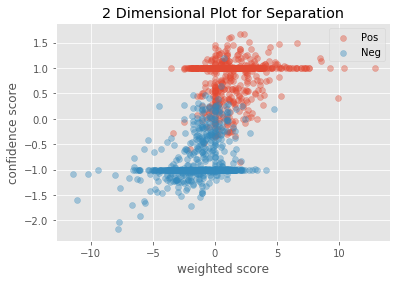

In [25]:
plt.scatter(weightscore[1000:2000],decision[1000:2000],alpha=0.4,label="Pos")
plt.scatter(weightscore[0:1000],decision[0:1000],alpha=0.4,label = "Neg")
plt.xlabel("weighted score")
plt.ylabel("confidence score")
plt.title("2 Dimensional Plot for Separation")
plt.legend()
plt.show()

In [47]:
# do a LDA on the 2D data
newX = [[weightscore[i],decision[i]] for i in range(len(weightscore))]

In [48]:
newX_train, newX_test, y_train, y_test = train_test_split(
        newX, dataset.target, test_size=0.5, random_state=10)

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf2 = LinearDiscriminantAnalysis()

lda = clf2.fit(newX_train, y_train)

y_predicted2 = lda.predict(newX_test)

print(metrics.classification_report(y_test, y_predicted2,
                                        target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.93      0.90      0.92       494
        pos       0.91      0.93      0.92       506

avg / total       0.92      0.92      0.92      1000



In [30]:
b1 = lda.coef_[0][0]
b2 = lda.coef_[0][1]
b = lda.intercept_[0]
print(b1,b2,b)

-3.44049790652 246.961439774 0.333667580795


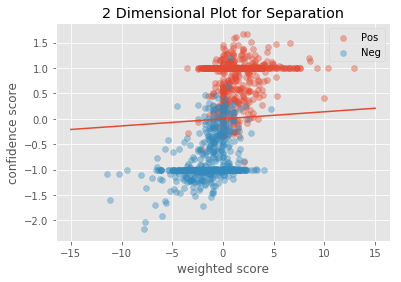

In [31]:
plt.scatter(weightscore[1000:2000],decision[1000:2000],alpha=0.4,label ="Pos")
plt.scatter(weightscore[0:1000],decision[0:1000],alpha=0.4,label = "Neg")
x = np.linspace(-15,15,1000)
y_s = np.poly1d([-b1/b2,-b/b2])(x)
plt.plot(x,y_s)
plt.xlabel("weighted score")
plt.ylabel("confidence score")
plt.title("2 Dimensional Plot for Separation")
plt.legend()
plt.show()

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **